# Laboratorio 4: Regression

#### Cristina Bautista - 161260

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
datos = pd.read_csv('insurance.csv')

### Checkear el head 

In [3]:
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
age         348 non-null int64
sex         348 non-null int64
bmi         348 non-null float64
children    348 non-null int64
smoker      348 non-null int64
region      348 non-null int64
charges     348 non-null float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [5]:
datos.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


## Exploratory Data Analysis

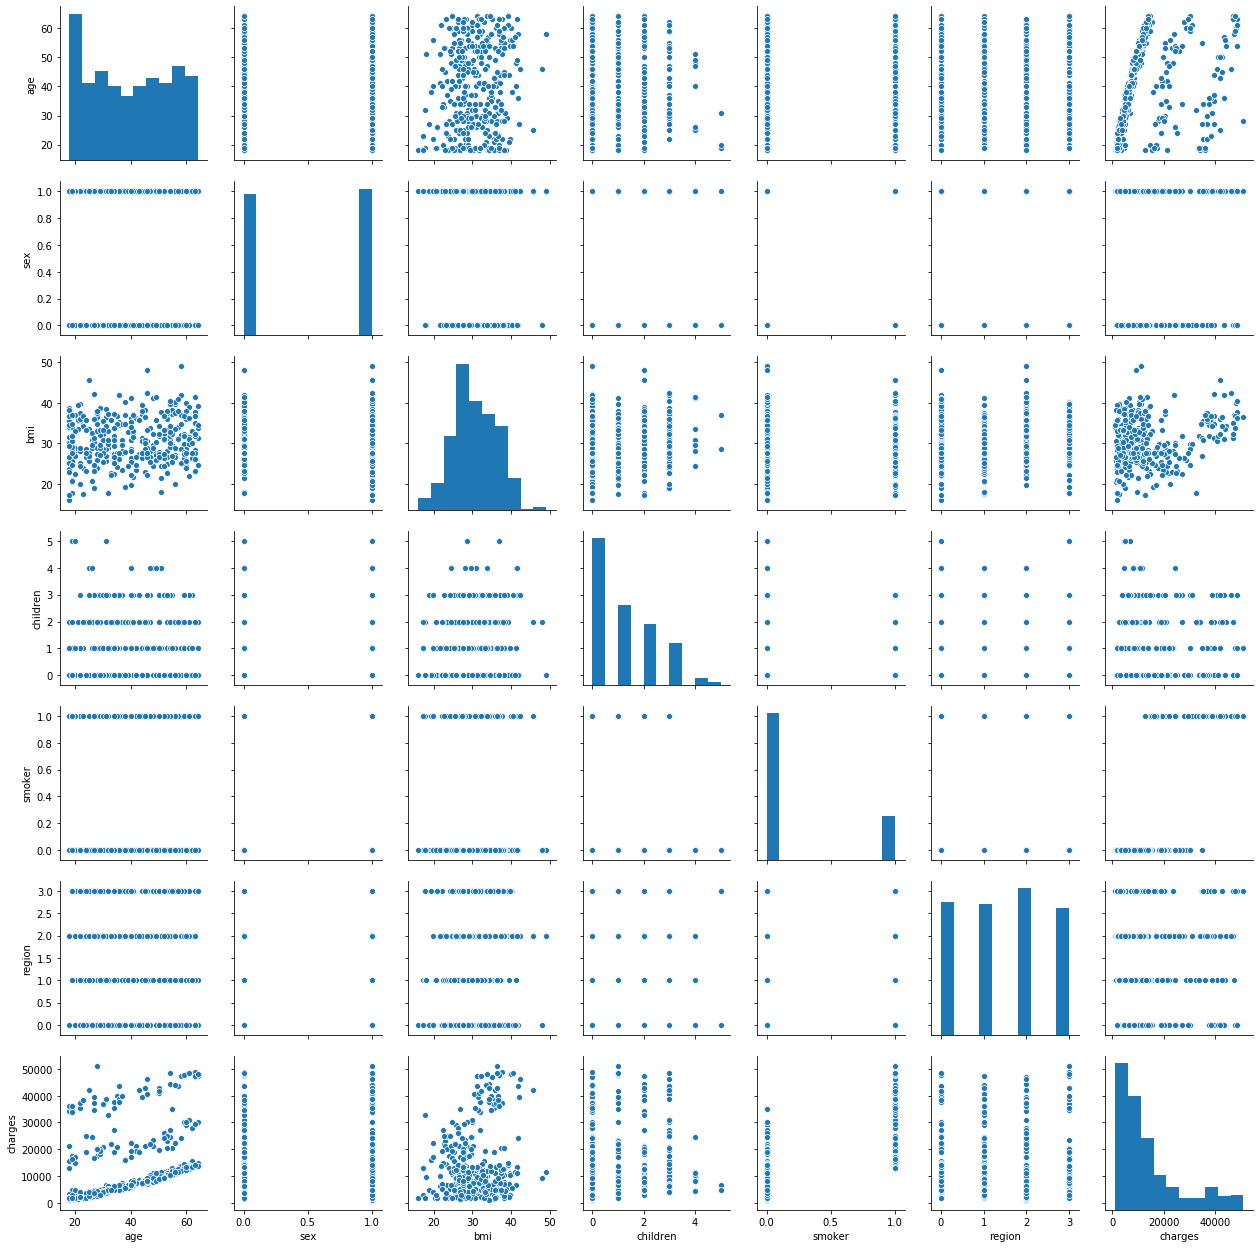

In [6]:
sns.pairplot(data=datos)

(array([59., 31., 36., 30., 26., 30., 33., 31., 38., 34.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

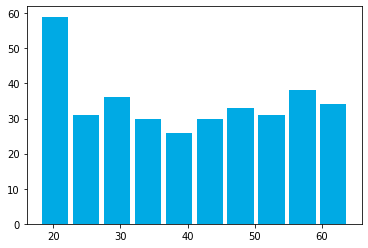

In [7]:
plt.hist(x=datos.age, color='#00AAE4', rwidth=0.85)

(array([171.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 177.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

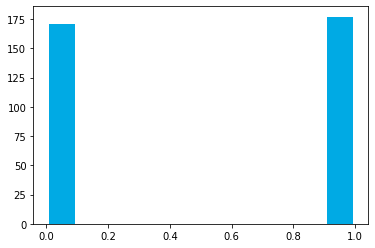

In [8]:
plt.hist(x=datos.sex, color='#00AAE4', rwidth=0.85)

(array([86.,  0.,  0., 85.,  0.,  0., 95.,  0.,  0., 82.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

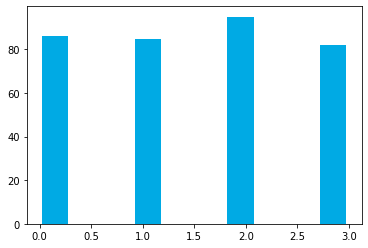

In [9]:
plt.hist(x=datos.region, color='#00AAE4', rwidth=0.85)

(array([110.,  85.,  54.,  26.,  17.,   9.,   9.,  17.,  10.,  11.]),
 array([ 1137.011   ,  6142.765814, 11148.520628, 16154.275442,
        21160.030256, 26165.78507 , 31171.539884, 36177.294698,
        41183.049512, 46188.804326, 51194.55914 ]),
 <a list of 10 Patch objects>)

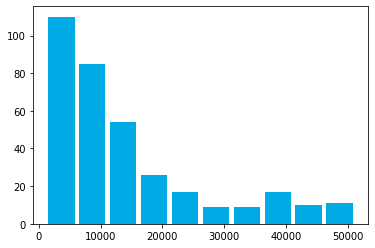

In [10]:
plt.hist(x=datos.charges, color='#00AAE4', rwidth=0.85)

### Revisar que no hay NAN 

In [11]:
datos.isnull().values.any()

False

### Revisar si los campos son numericos

In [12]:
datos.count()

age         348
sex         348
bmi         348
children    348
smoker      348
region      348
charges     348
dtype: int64

## Preparacion de los datos - Datos Categoricos 

### Label Encoder 

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(datos.sex)
le.fit(datos.smoker)

LabelEncoder()

In [14]:
ohe = preprocessing.OneHotEncoder(categories='auto')
ohe.fit(datos[['region']])

OneHotEncoder(categorical_features=None, categories='auto', drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

## Dividir en training y test 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = datos.drop(columns=['charges'])
X = datos[['bmi']]
y = datos['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

## Preparacion de los datos - Escala 

In [18]:
ss = preprocessing.StandardScaler()
ss.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

## Modelacion Lineal 

### Modelo 1

Para comprender el modelo me guíe de este video en Youtube: https://www.youtube.com/watch?v=JvS2triCgOY

In [19]:
x = np.mean(X_train)
y = np.mean(y_train)
#x, y

n = len(X_train)
numerador = []
denominador = []
for i in range(n):
    a = X_train.values[i] - x
    b = y_train.values[i] - y
    c = (X_train.values[i] - x)**2 
    d = a * b
    numerador.append(d)
    denominador.append(c)
numerador, denominador = sum(numerador), sum(denominador)
m = numerador / denominador
b = (y - (m * x))

## Modelo 2 - sklearn 

In [20]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Modelo 3 -  Todos

In [21]:
X3=datos[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
y3=datos['charges']

In [22]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, shuffle=False)

In [23]:
ss.fit(X3)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
lm = linear_model.LinearRegression()
lm.fit(X_train3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluacion de los Modelos

### Modelo 1

In [25]:
print("Coeficientes")
print(m)
print(c)

Coeficientes
bmi    334.463055
dtype: float64
bmi    163.810885
dtype: float64


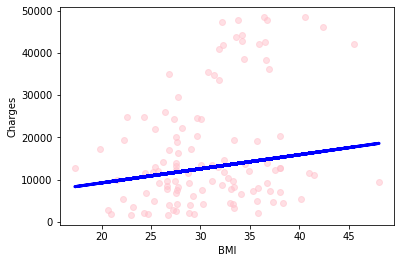

In [26]:
plt.scatter(X_test['bmi'], y_test, alpha=0.5, color='pink')
plt.plot(X_test, lr.predict(X_test), linewidth=3, color='blue')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

## Modelo 2 

In [27]:
coefs2 = lr.coef_
coefs2

array([334.46305492])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Mean Absolute Error (MAE)
print(mean_absolute_error(lr.predict(X_test), y_test))
#Mean Squared Error (MSE)
print(mean_squared_error(lr.predict(X_test), y_test))
#Root Mean Squared Error (RMSE)
print(r2_score(lr.predict(X_test), y_test))

10064.533942303247
186406602.9370522
-51.72716280369592


## Modelo 3

In [29]:
coefs3 = lm.coef_
coefs3

array([ 8.42734522e-14, -9.80215908e-13,  2.71219218e-13,  2.80128094e-14,
        1.76936778e-11, -3.62326496e-14,  1.00000000e+00])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Mean Absolute Error (MAE)
print(mean_absolute_error(lm.predict(X_test3), y_test3))
#Mean Squared Error (MSE)
print(mean_squared_error(lm.predict(X_test3), y_test3))
#Root Mean Squared Error (RMSE)
print(r2_score(lm.predict(X_test3), y_test3))

2.7640730284316384e-12
1.851535908076576e-23
1.0


## Regresion Polinomial

In [56]:
from sklearn.preprocessing import PolynomialFeatures
polyTrain = PolynomialFeatures(2)
polyTrainShape = polyTrain.fit_transform(X_train.to_numpy().reshape(-1,1))

polylr = linear_model.LinearRegression()
polylr.fit(polyTrainShape, y_train)

polyTest = PolynomialFeatures(2)
polyTestShape = polyTest.fit(X_test.to_numpy().reshape(-1,1))
#print(polyTrain)

In [58]:
prediction = polylr.predict(polyTrain.fit_transform(X_train.to_numpy().reshape(-1,1)))

In [60]:
print(mean_absolute_error(y_train, prediction))
print(mean_squared_error(y_train, prediction))

9198.586092739748
138108325.08238232


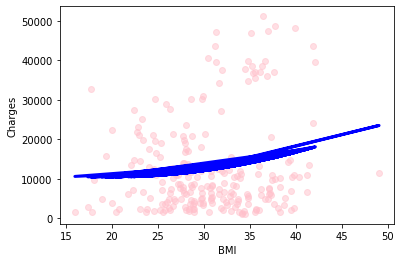

In [61]:
plt.scatter(X_train, y_train, alpha=0.5, color='pink')
plt.plot(X_train, prediction, linewidth=3, color='blue')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()